# Decision Tree with GradientBoosting and Experimentation

# Student Math Grade

## Import Data and Libraries and creating Train , Test Set

In [60]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6





In [61]:
data = pd.read_csv("student-mat.csv", sep = ";")
median = data['G3'].median()
data['G3'] = np.where(data['G3']>=median, 'Good Grade','Bad Grade')
# 1: represents Large
# 0: represents Small
data = data.drop(["G1","G2"], axis=1)

In [62]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,Bad Grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,Bad Grade
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,Bad Grade
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,Good Grade
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,Bad Grade


In [63]:
cat = data.select_dtypes(include=['object']).columns.values
num = data.select_dtypes(include=['int64']).columns.values
cat
num
ordinal = ['famsize','Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 
                    'Dalc', 'Walc', 'health', 'G3']
nominal = ['school', 'sex', 'address','Pstatus','Mjob', 'Fjob','reason','guardian','schoolsup', 
                          'famsup','paid', 'activities','nursery', 'higher', 'internet', 'romantic']

for i in ordinal:
    data[i] = pd.Categorical(data[i], ordered=True)
    
for i in nominal:
    data[i] = pd.Categorical(data[i])
    
cat = data.select_dtypes(include=['category']).columns.values

cat

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'G3'], dtype=object)

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'G3'], dtype=object)

In [64]:
data[nominal].head()

,school,sex,address,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [65]:
data[cat].head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,1,3,Bad Grade
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,yes,yes,no,5,3,3,1,1,3,Bad Grade
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,3,Bad Grade
3,GP,F,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,3,2,2,1,1,5,Good Grade
4,GP,F,U,GT3,T,3,3,other,other,home,...,yes,no,no,4,3,2,1,2,5,Bad Grade


In [66]:
dummy= pd.get_dummies(data.iloc[:,:30],drop_first = True)
dummy.head()
data = pd.concat([data['G3'],dummy],axis = 1)
data.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,4,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,10,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,4,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


,G3,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,Bad Grade,18,6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Bad Grade,17,4,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Bad Grade,15,10,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,Good Grade,15,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Bad Grade,16,4,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [67]:
data.columns

Index(['G3', 'age', 'absences', 'school_MS', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'traveltime_2', 'traveltime_3', 'traveltime_4', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_1', 'failures_2', 'failures_3',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes', 'famrel_2',
       'famrel_3', 'famrel_4', 'famrel_5', 'freetime_2', 'freetime_3',
       'freetime_4', 'freetime_5', 'goout_2', 'goout_3', 'goout_4', 'goout_5',
       'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_2', 'Walc_3', 'Walc_4',
       'Walc_5', 'health_2', 'health_3', 'health_4', 

In [68]:
data[['age','absences']] = (data[['age','absences']] - data[['age','absences']].mean())/ (data[['age','absences']].max() - data[['age','absences']].min())
data[['age','absences']].describe()
data.head()

,age,absences
count,3.950000e+02,3.950000e+02
mean,-1.356159e-16,-6.556816e-18
std,1.822918e-01,1.067079e-01
min,-2.423146e-01,-7.611814e-02
25%,-9.945750e-02,-7.611814e-02
50%,4.339964e-02,-2.278481e-02
75%,1.862568e-01,3.054852e-02
max,7.576854e-01,9.238819e-01


,G3,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,Bad Grade,0.186257,0.003882,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Bad Grade,0.043400,-0.022785,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Bad Grade,-0.242315,0.057215,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,Good Grade,-0.242315,-0.049451,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Bad Grade,-0.099458,-0.022785,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X.head()
Y.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,0.186257,0.003882,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.043400,-0.022785,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.242315,0.057215,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.242315,-0.049451,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.099458,-0.022785,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


0     Bad Grade
1     Bad Grade
2     Bad Grade
3    Good Grade
4     Bad Grade
Name: G3, dtype: category
Categories (2, object): [Bad Grade < Good Grade]

In [70]:
feature_names = ['age', 'absences', 'school_MS', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'traveltime_2', 'traveltime_3', 'traveltime_4', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_1', 'failures_2', 'failures_3',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes', 'famrel_2',
       'famrel_3', 'famrel_4', 'famrel_5', 'freetime_2', 'freetime_3',
       'freetime_4', 'freetime_5', 'goout_2', 'goout_3', 'goout_4', 'goout_5',
       'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_2', 'Walc_3', 'Walc_4',
       'Walc_5', 'health_2', 'health_3', 'health_4', 'health_5'] 
labels = feature_names

In [71]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive




X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 100)                           
                           

def plot_tree(crit, split, depth , min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print("Controlled Decision Tree : Change the above parameters and observe the difference.","\n","To see the effect of pruning, change the tree depth and notice the change in various metrics")
    print("\n")
    print("Acuracy on training set: {:.3f}".format(estimator.score(X_train, y_train)*100))
    print("Acuracy on test set: {:.3f}".format(estimator.score(X_test, y_test)*100))
    print("\n Confusion Matrix: \n")
    print(confusion_matrix(y_test, predictions))
    print("\n Classification Report: \n")
    print(classification_report(y_test, predictions))
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels, rounded = True, impurity = True
      , class_names=['Bad Grade', 'Good Grade']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,6,7,8,9,10,11,12]
   , min_split=(2)
   , min_leaf=5)
display(inter)                              



### Learning curves

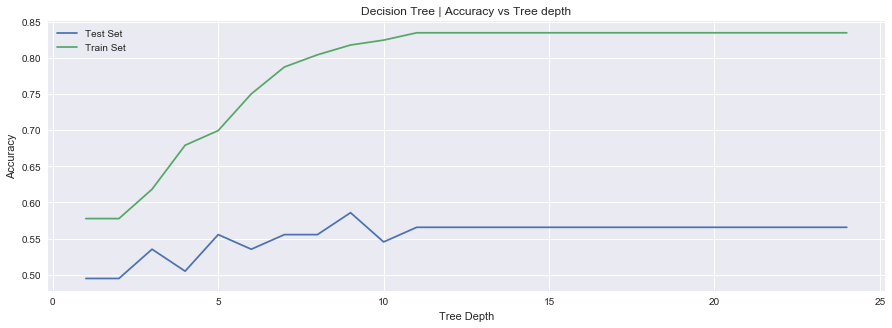

In [72]:
def learning_curve(crit, split, min_split, min_leaf=0.2):
    accuracy_test=[None]*25
    accuracy_train=[None]*25
    count=1
    for max_depth in range(1,25):
        estimator = DecisionTreeClassifier(random_state = 100 
        , criterion = crit
        , splitter = split
        , max_depth = max_depth                                   
        , min_samples_split=min_split
        , min_samples_leaf=min_leaf)
        estimator.fit(X_train, y_train)
        accuracy_train[count]=estimator.score(X_train, y_train)
        accuracy_test[count]=estimator.score(X_test, y_test)
        count+=1
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    ax1.plot(range(0,25),accuracy_test)
    ax1.plot(range(0,25),accuracy_train)
    plt.title("Decision Tree | Accuracy vs Tree depth")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy")
    plt.legend(['Test Set','Train Set'])   
    

inter=interactive(learning_curve 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , min_split=(2)
   , min_leaf=5)
display(inter)                              


    
    

In [73]:
data.iloc[:,0].replace(['Good Grade','Bad Grade'],[1,0],inplace = True)

In [74]:
y = data.iloc[:,0]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: G3, dtype: int64

## Gradient Boosting Classifier

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=15, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=15, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=15, presort='auto', random_state=100,
              subsample=0.5, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=15, presort='auto', random_state=100,
              subsample=0.5, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=15,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

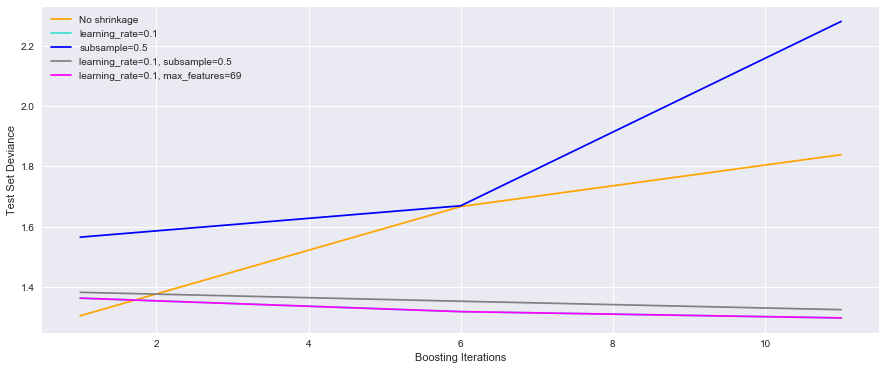

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble




X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)                           
                           
original_params = {'n_estimators':15,
                  'max_leaf_nodes': 4, 'max_depth': 2, 'random_state': 100,
                   'min_samples_split': 2,'loss':'deviance'}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=69', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 69})]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

In [76]:
params = dict(original_params)
params.update(setting)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Acuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=15,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

Acuracy on training set: 71.284
Acuracy on test set: 68.687

 Confusion Matrix: 

[[28 15]
 [16 40]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.64      0.65      0.64        43
          1       0.73      0.71      0.72        56

avg / total       0.69      0.69      0.69        99



### Gradient Boosting Classifier with loss function as exponential

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=0.5, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=100,
              subsample=0.5, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

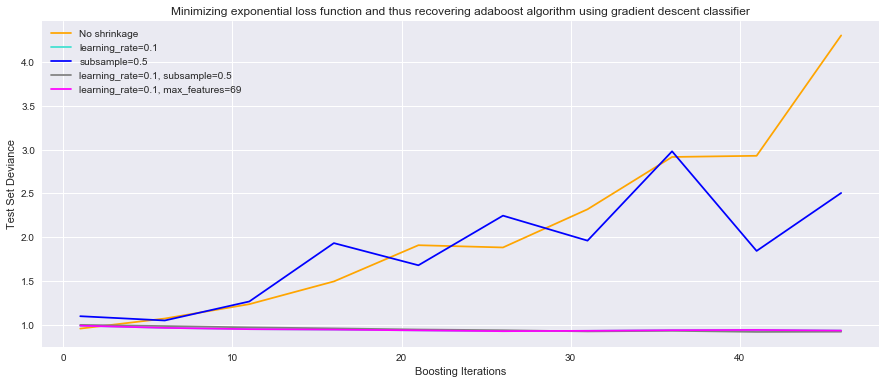

In [77]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble




X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)                           
                           
original_params1 = {'n_estimators':50,
                  'max_leaf_nodes': 4, 'max_depth':15, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
#the accuracy doesnot change after increasing the max_depth greater than 2
plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=69', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 69})]:
    params = dict(original_params1)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')
plt.title("Minimizing exponential loss function and thus recovering adaboost algorithm using gradient descent classifier")
plt.show()

In [78]:

params = dict(original_params1)
params.update(setting)

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Acuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

Acuracy on training set: 83.784
Acuracy on test set: 64.646

 Confusion Matrix: 

[[28 15]
 [20 36]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.58      0.65      0.62        43
          1       0.71      0.64      0.67        56

avg / total       0.65      0.65      0.65        99



In [79]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0


for max_depth in range(1,16):
    original_params1 = {'n_estimators':22,
                  'max_leaf_nodes': 4, 'max_depth':max_depth, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
    params = dict(original_params1)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy_train[count]=clf.score(X_train, y_train)
    accuracy_test[count]=clf.score(X_test, y_test)
    count+=1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=1,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=5,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=6,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=7,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=8,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=9,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=11,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=12,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=13,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=14,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=15,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

[0.6993243243243243,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432]

[0.6464646464646465,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071,
 0.7070707070707071]

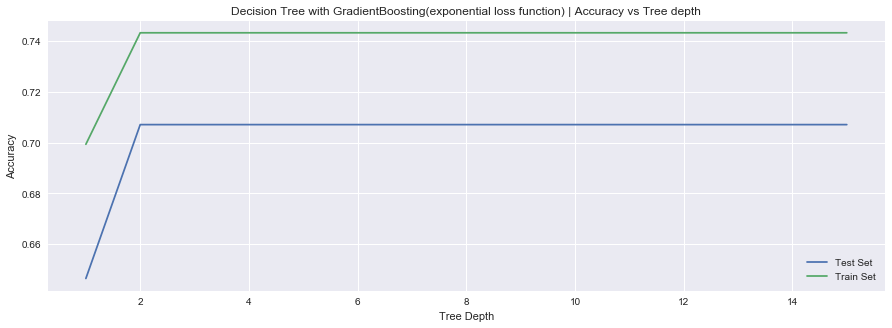

In [80]:
accuracy_train
accuracy_test
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with GradientBoosting(exponential loss function) | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

In [81]:
accuracy_test=[None]*100
accuracy_train=[None]*100
count=0


for n_estimators in range(1,101):
    original_params1 = {'n_estimators':n_estimators,
                  'max_leaf_nodes': 4, 'max_depth':2, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential'}
    params = dict(original_params1)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy_train[count]=clf.score(X_train, y_train)
    accuracy_test[count]=clf.score(X_test, y_test)
    count+=1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=1, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=2, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=4, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=6, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=8, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=9, presort='auto',
              random_state=100, subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=11,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=12,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=13,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=14,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=15,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=16,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=17,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=18,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=19,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=21,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=22,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=23,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=24,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=26,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=27,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=28,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=29,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=31,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=32,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=33,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=34,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=35,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=36,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=37,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=38,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=39,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=41,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=42,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=43,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=44,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=45,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=46,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=47,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=48,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=49,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=52,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=53,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=54,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=55,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=56,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=57,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=58,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=59,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=61,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=62,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=63,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=64,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=65,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=66,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=67,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=68,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=69,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=71,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=72,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=73,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=74,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=75,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=76,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=77,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=78,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=79,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=81,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=82,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=83,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=84,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=85,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=86,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=87,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=88,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=89,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=91,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=92,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=93,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=94,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=95,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=96,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=97,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=98,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=99,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=69, max_leaf_nodes=4, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False)

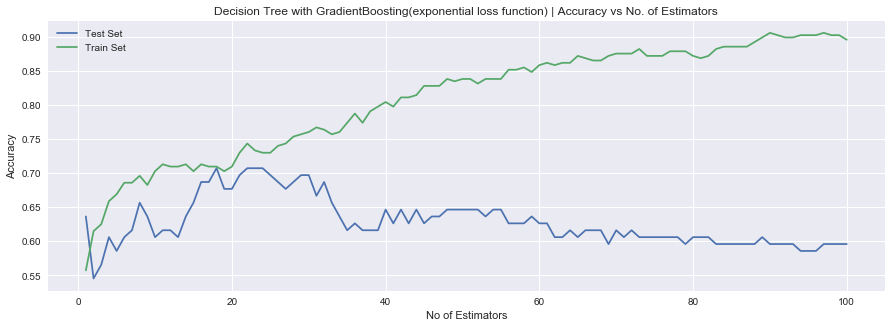

In [82]:
 
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,101),accuracy_test)
ax1.plot(range(1,101),accuracy_train)


plt.title("Decision Tree with GradientBoosting(exponential loss function) | Accuracy vs No. of Estimators")
plt.xlabel("No of Estimators")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

### At max tree depth = 2 and no. of estimators = 22 we get a better accuracy on both test and train set
### At max tree depth = 10 and no. of estimators = 22 also we get better accuracy
### At max tree depth = 15 and no. of estimators = 22 we get better fit and accuracy

## This implies optimum no. of estimators = 22 and max_tree depth = 2

### now lets see the change in convergence using tuning of alpha or learning_rate

In [87]:
accuracy_test=[None]*7
accuracy_train=[None]*7
count=0


for alpha in [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1]:
    original_params1 = {'n_estimators':22,
                  'max_leaf_nodes': 4, 'max_depth':2, 'random_state': 100,
                   'min_samples_split': 3,'loss':'exponential','learning_rate': alpha}
    params = dict(original_params1)
    
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy_train[count]=clf.score(X_train, y_train)
    accuracy_test[count]=clf.score(X_test, y_test)
    count+=1


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x14d531d56d8>,
 <a list of 7 Text xticklabel objects>)

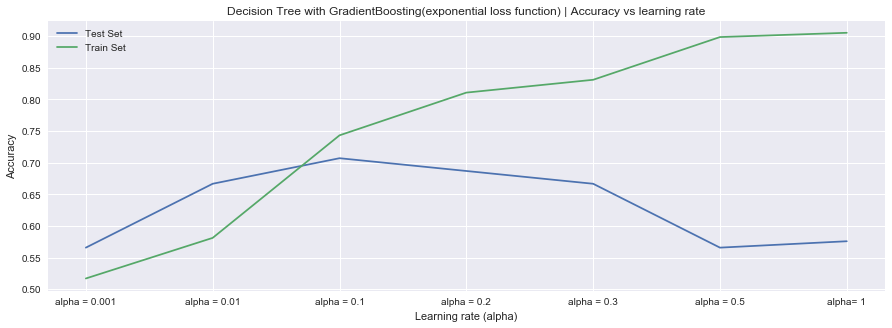

In [88]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,8),accuracy_test)
ax1.plot(range(1,8),accuracy_train)


plt.title("Decision Tree with GradientBoosting(exponential loss function) | Accuracy vs learning rate")
plt.xlabel("Learning rate (alpha)")
plt.ylabel("Accuracy")
plt.xticks((1,2,3,4,5,6,7), ('alpha = 0.001', 'alpha = 0.01', 'alpha = 0.1', 'alpha = 0.2', 'alpha = 0.3','alpha = 0.5','alpha= 1'))
plt.legend(['Test Set','Train Set'])

### optimum parameters: 
**alpha = 0.1** <br>
**no. of estimators = 22** <br>
**tree depth = 2**


In [85]:
optimum_params = {'n_estimators': 22,
                  'max_leaf_nodes': 4, 'max_depth':2, 'random_state': 100,
                   'min_samples_split': 10,'loss':'exponential','learning_rate' : 0.1}
params = dict(optimum_params)


clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Acuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=4,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=22, presort='auto', random_state=100,
              subsample=1.0, verbose=0, warm_start=False)

Acuracy on training set: 74.324
Acuracy on test set: 70.707

 Confusion Matrix: 

[[29 14]
 [15 41]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.66      0.67      0.67        43
          1       0.75      0.73      0.74        56

avg / total       0.71      0.71      0.71        99

